# Time Series Analysis of US CPI

## Installing Dependencies

In [2]:
install.packages("rugarch")

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(astsa)
library(forecast)
library(rugarch)
library(lubridate)

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Abstract

The CPI, a critical indicator of inflation, measures the average change in prices paid by urban consumers for a basket of goods and services. Using Bureau of Labor Statistics data dating back to 1913, we can gain valuable insights into long-term inflation trends, economic cycles, and the effects of economic policies on purchasing power.. Given that inflation is one of the leading issues today, examining the CPI will provide a deeper understanding of our circumstance. 

## The Data

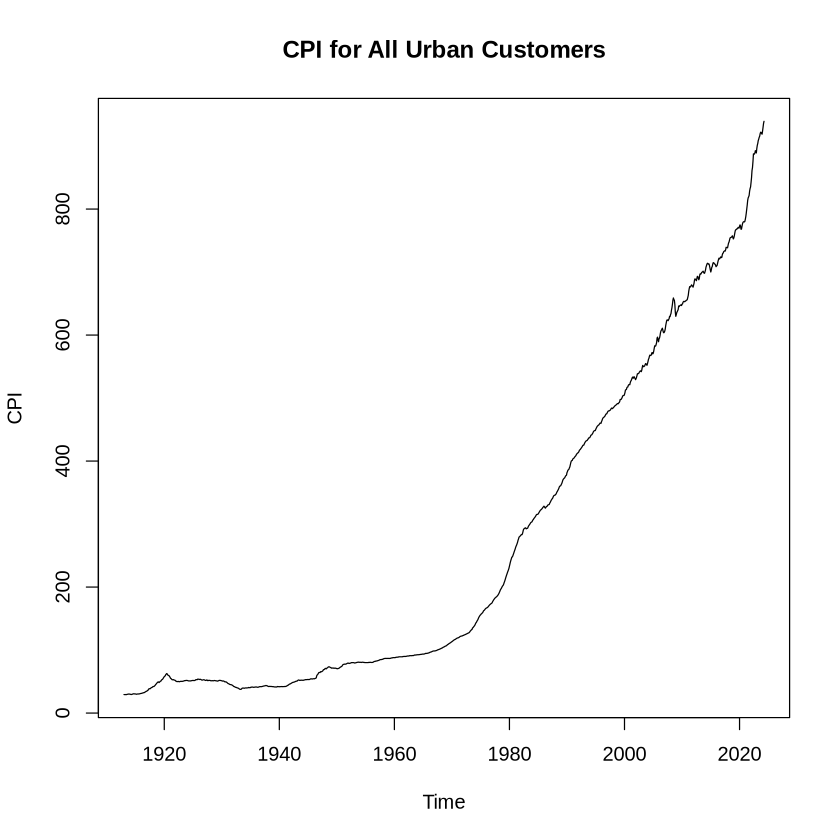

In [112]:
#https://data.bls.gov/cgi-bin/surveymost
df <- read.csv("project data.csv")
ts <- ts(df, start = c(1913, 1), frequency = 12)
ts <- ts[, 1]
ts.plot(ts, ylab = "CPI", main='CPI for All Urban Customers')

Upon plotting the Consumer Price Index (CPI) data from the dataset, we observed that the series exhibits non-stationary behavior, characterized by a consistent upward trend. This can complicate Time Series analysis, so a log transformation is applied to stationarize the data, which stabilizes the variance and makes the data more homoscedastic. This transformation is a crucial step in preparing the data for further analysis, as it aligns with the requirements of many time series models that assume stationarity. 

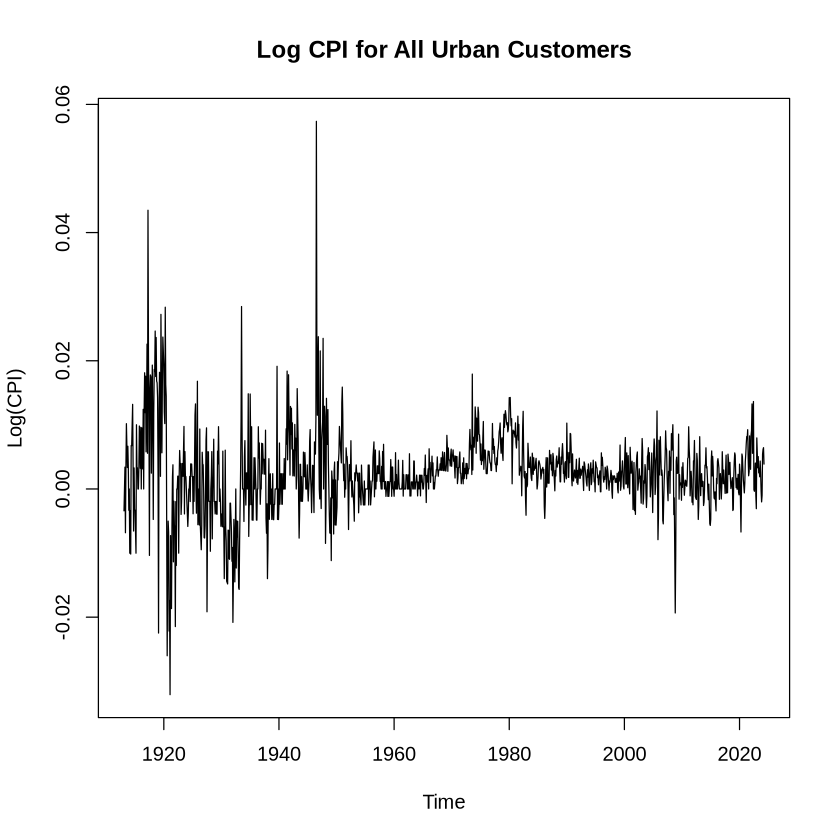

In [47]:
ts_log_1 = log(ts)
ts_log = diff(log(ts))
ts.plot(ts_log, ylab='Log(CPI)',main='Log CPI for All Urban Customers')

We can visually see the effects of the log transformation on the CPI data. This adjustment is clearly observed in the time series plot, where the transformed data exhibits less fluctuation over time, indicating a more stable variance. Consequently, this transformation facilitates the application of statistical methods that assume stationarity, enhancing the reliability of our subsequent time series analysis.

## ACF/PACF

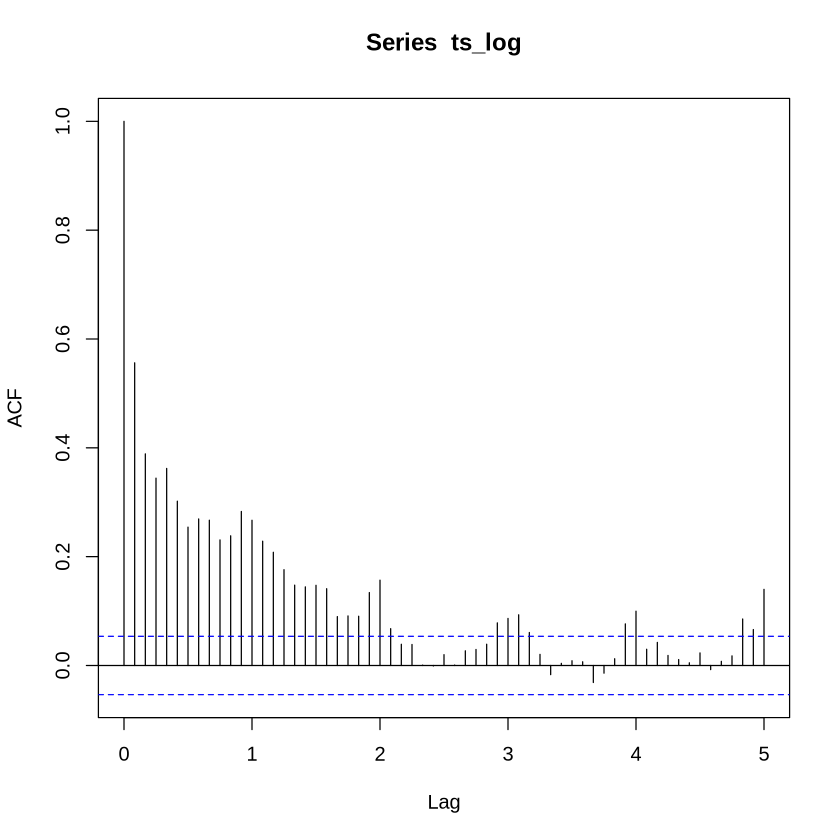

In [110]:
acf_data = acf(ts_log, lag.max = 60)

The Autocorrelation Function (ACF) measures the correlation between an observation and a range of previous observations. It provides insights into the persistence and structure of the data over time. In our analysis, the ACF plot of the original CPI data shows that the autocorrelations do not decline quickly as the lag increases, suggesting that the data exhibits significant autocorrelation over long periods. We can also high autocorrelations at a lag of 3, 4, and 5 possibly exhibiting a monthly seasonality. However, these could be residual autocorrelations left over from the untransformed data. This can obscure underlying seasonal trends. Looking at the PACF can help us see through these residual autocorrelations. 

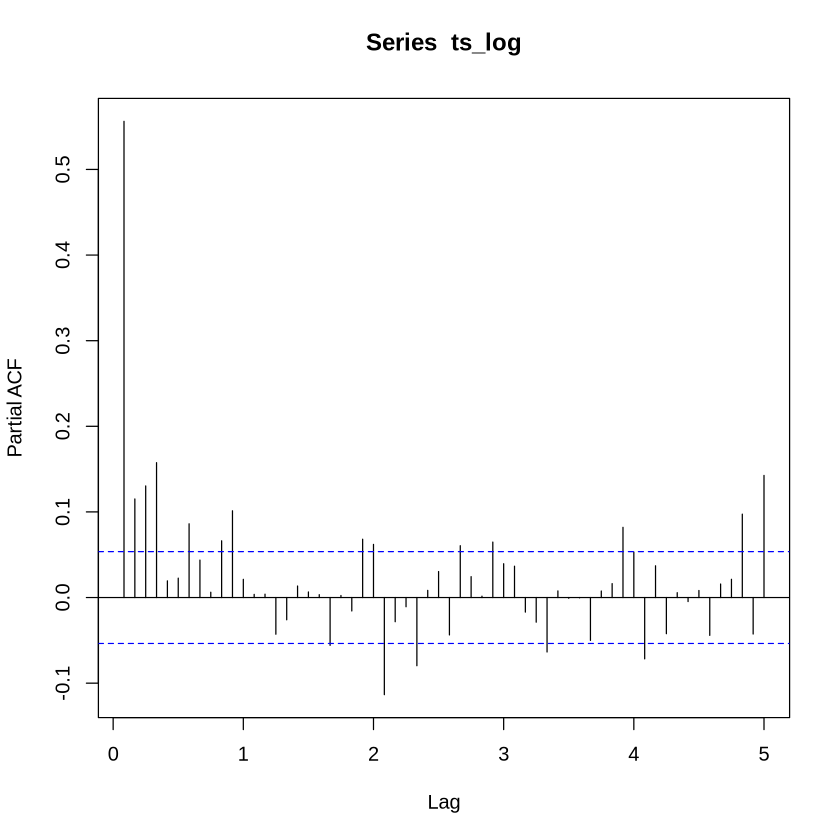

In [7]:
pacf(ts_log, lag.max=60)

The Partial Autocorrelation Function (PACF) is almost the same as the ACF, however the observed correlation is between the observation and a single previous value rather than a range. By isolating the direct relationship between an observation and its lagged values, the PACF helps identify the underlying structure of the time series, particularly in terms of autoregressive processes. When examining the PACF, significant spikes at specific lags can indicate seasonality, as these suggest a repetitive pattern at those intervals. In this PACF graph, we observe statistically significant PACF values at 5 months. This suggests that the CPI exhibits a recurring pattern every 5 months, reflecting the seasonal nature of consumer price fluctuations. A SARIMA model can model this data well.

## SARIMA Model

A Seasonal Autoregressive Integrated Moving Average (SARIMA) model is an extension of the ARIMA model designed to handle time series data with seasonal patterns. While ARIMA models account for non-seasonal aspects of the data using autoregression (AR), differencing (I), and moving average (MA) components, SARIMA models include additional seasonal terms to capture the repeating patterns at specific seasonal intervals. This makes SARIMA particularly useful for datasets like the CPI, which exhibit seasonal fluctuations. In R, we can identify the best SARIMA model by using the “auto.arima” function with the “seasonal=TRUE” parameter. This function automatically searches through various combinations of ARIMA and seasonal parameters to select the model that best fits the data, optimizing criteria like the Akaike Information Criterion (AIC). By doing this, we ensure that our model effectively accounts for both the non-seasonal and seasonal variations in the CPI data, leading to more accurate forecasts and better insights. 

In [8]:
sarima_fit = auto.arima(ts_log, seasonal = TRUE)
sarima_fit

Series: ts_log 
ARIMA(1,0,0)(2,0,1)[12] with non-zero mean 

Coefficients:
         ar1     sar1    sar2    sma1    mean
      0.5356  -0.0243  0.1396  0.1133  0.0026
s.e.  0.0239   0.5427  0.0538  0.5511  0.0004

sigma^2 = 2.546e-05:  log likelihood = 5168.84
AIC=-10325.68   AICc=-10325.62   BIC=-10294.5

The output from the ARIMA model selection indicates that the best SARIMA model for our time series data is ARIMA(1,0,0)(2,0,1)[12] with a non-zero mean. The accuracy measures AIC, AICc, and BIC are highly negative, further indicating a well-fitted model. Using this model, we can predict future values for the time series, capturing both the trend and seasonal patterns observed in the data, which is crucial for accurate forecasting of the Consumer Price Index (CPI). We can deploy our model on the data to predict future CPI values.

             Jan         Feb         Mar         Apr         May         Jun
2024                                                 0.004007107 0.004211283
2025 0.003459969 0.003205208 0.002879326 0.002991934                        
             Jul         Aug         Sep         Oct         Nov         Dec
2024 0.002272143 0.002440803 0.002554982 0.002446368 0.001685574 0.001534495
2025                                                                        


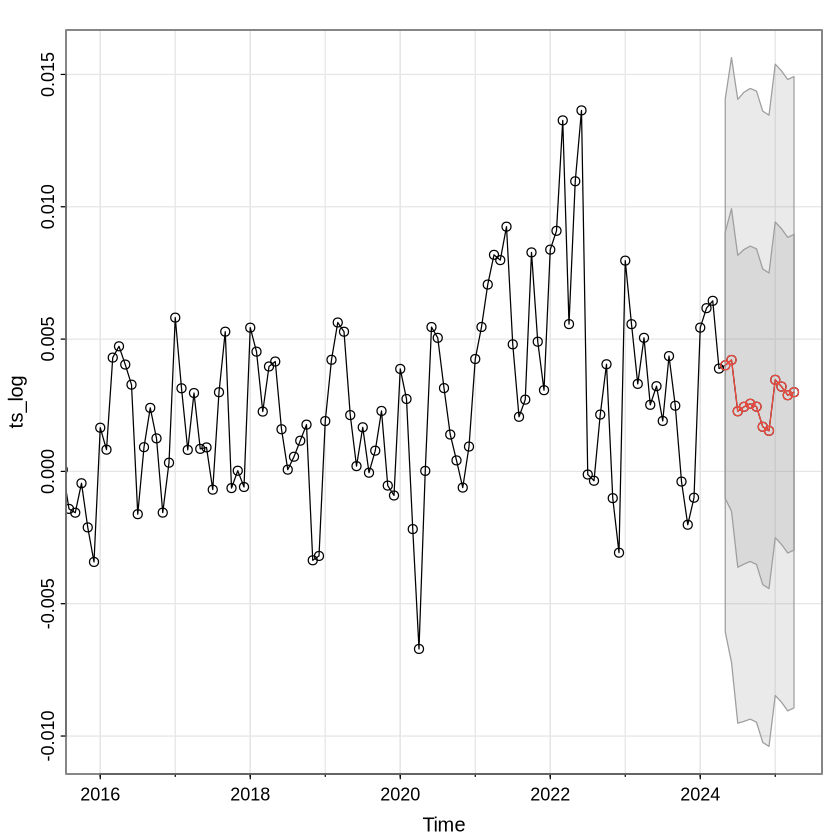

In [10]:
sarima_forecast <- sarima.for(ts_log, n.ahead = 12, p = 1, d = 0, q = 0, P = 2, D = 0, Q = 1, S = 12)
# Print the forecasted values
print(sarima_forecast$pred)

The forecasting results depicted in the graph show the predicted values for the time series along with their confidence intervals. The forecasted values are marked in red, indicating the continuation of the trend observed in the historical data. The gray shaded area represents the uncertainty of the predictions, expanding as we forecast further into the future. The relatively narrow confidence intervals reflect the model's effectiveness, as indicated by the low AIC and BIC values. These metrics support the reliability of the SARIMA(1,0,0)(2,0,1)[12] model in capturing both the trend and seasonality present in the data, leading to more accurate and meaningful predictions.

In [11]:
sarima_forecast$pred

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,0.004007107,0.004211283,0.002272143,0.002440803,0.002554982,0.002446368,0.001685574,0.001534495
2025,0.003459969,0.003205208,0.002879326,0.002991934,,,,,,,,


To transplant the predictions from the log-transformed data back onto our original non-stationary data, we need to reverse the transformations we applied initially. First, we need to exponentiate the predicted values to revert the log transformation and add these exponentiated predictions to the last observed value of the original series to ensure continuity. This approach ensures that our forecasts align accurately with the scale and level of the original data, allowing us to extend our historical CPI series with meaningful future values.

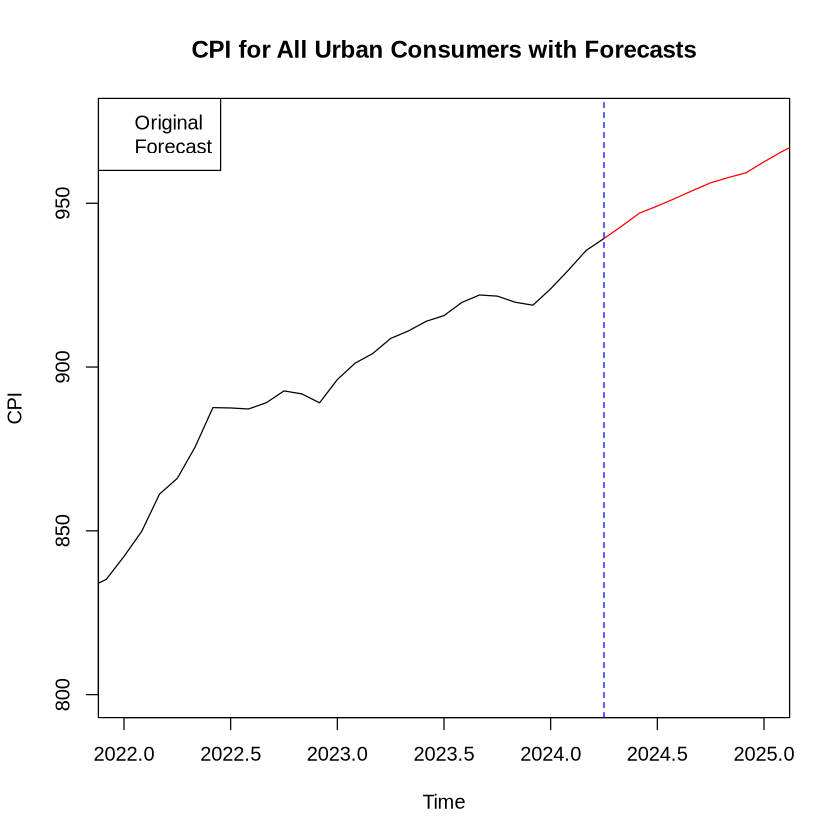

In [101]:
# reversed_log_ts <- c(ts_log_1[1], cumsum(c(0, ts_log)))  # Add the first value of log_ts to get back the cumulative log series

# # Convert the log-transformed series back to the original scale by exponentiating
# orig_ts <- exp(reversed_log_ts)

# # Print the original time series (before transformation)
# ts.plot(orig_ts)

last_actual_log <- tail(ts_log_1, 1)[1][1]
ts_tail = tail(ts,1)[1][1]
#last_actual_log

reversed_log_ts = cumsum((c(last_actual_log, sarima_forecast$pred)))
#reversed_log_ts
original_forecasts = exp(reversed_log_ts)


# log_forecasts <- cumsum(c(exp(last_actual_log), exp(sarima_forecast$pred)))
# log_forecasts

# original_forecasts <- log_forecasts


forecast_ts <- ts(original_forecasts, start = end(ts), frequency = frequency(ts))


plot(ts, ylab = "CPI", xlim = c(2022,2025), ylim =c(800,975), main = 'CPI for All Urban Consumers with Forecasts')

# Add the forecasted values in red
lines(window(forecast_ts, start = end(ts)), col = "red")

abline(v = end(ts) + .25, col = "blue", lty = 2)

legend("topleft", legend = c("Original", "Forecast"), col = c("black", "red"))


Another model that might be worth trying is GARCH which is frequently used to model time series data in financial contexts. 

## GARCH Model

The GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model is essential for forecasting time series data with changing volatility, often found in financial and economic datasets. Unlike ARIMA models that focus on the mean, GARCH models capture time-varying volatility. Similar to the SARIMA process, we fit a GARCH model to our log-transformed CPI data and forecast future values.

In [24]:
fit_garch_models <- function(data) {
  models <- list()
  aic_values <- numeric()
  model_names <- character()
  
  ar_orders <- 0:2
  ma_orders <- 0:2
  garch_orders <- 1:2
  arch_orders <- 1:2
  
  for (ar in ar_orders) {
    for (ma in ma_orders) {
      for (p in garch_orders) {
        for (q in arch_orders) {
          spec <- ugarchspec(variance.model = list(garchOrder = c(p, q)),
                             mean.model = list(armaOrder = c(ar, ma), include.mean = TRUE),
                             distribution.model = "norm")
          
          fit <- tryCatch({
            ugarchfit(spec, data)
          }, error = function(e) {
            return(NULL)  # Return NULL if the fit fails
          })
          
          if (!is.null(fit) && all(!is.nan(infocriteria(fit)))) {
            aic <- infocriteria(fit)[1]  # Extract AIC value
            if (!is.na(aic)) {
              models[[paste0("ARMA(", ar, ",", ma, ")-GARCH(", p, ",", q, ")")]] <- fit
              aic_values <- c(aic_values, aic)
              model_names <- c(model_names, paste0("ARMA(", ar, ",", ma, ")-GARCH(", p, ",", q, ")"))
            }
          }
        }
      }
    }
  }
  
  if (length(models) == 0) {
    stop("No valid models were fitted.")
  }
  
  best_model_index <- which.min(aic_values)
  best_model_name <- model_names[best_model_index]
  best_model <- models[[best_model_index]]
  best_model_aic <- aic_values[best_model_index]
  
  return(list(best_model = best_model,
              best_model_name = best_model_name,
              best_model_aic = best_model_aic,
              aic_values = aic_values,
              model_names = model_names))
}


result <- fit_garch_models(ts_log)
best_model <- result$best_model

In [25]:
best_model


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,2)
Mean Model	: ARFIMA(2,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.002479    0.000479    5.17542 0.000000
ar1     1.281299    0.061968   20.67671 0.000000
ar2    -0.300696    0.058412   -5.14782 0.000000
ma1    -0.877879    0.007901 -111.10390 0.000000
omega   0.000000    0.000001    0.46115 0.644689
alpha1  0.211841    0.032291    6.56040 0.000000
beta1   0.349641    0.118945    2.93953 0.003287
beta2   0.437518    0.104691    4.17912 0.000029

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.002479    0.000665   3.729716 0.000192
ar1     1.281299    0.140303   9.132374 0.000000
ar2    -0.300696    0.129533  -2.321380 0.020266
ma1    -0.877879    0.062019 

The GARCH model fit results indicate that an sGARCH(1,2) model with an ARIMA(2,0,1) mean model and normal distribution provides the best fit for our time series data. The significant coefficients for both the mean and variance equations suggest that the model captures the underlying patterns and volatility dynamics well. However relative to the SARIMA model, the GARCH model has a higher AIC and BIC suggesting a worse fit. 

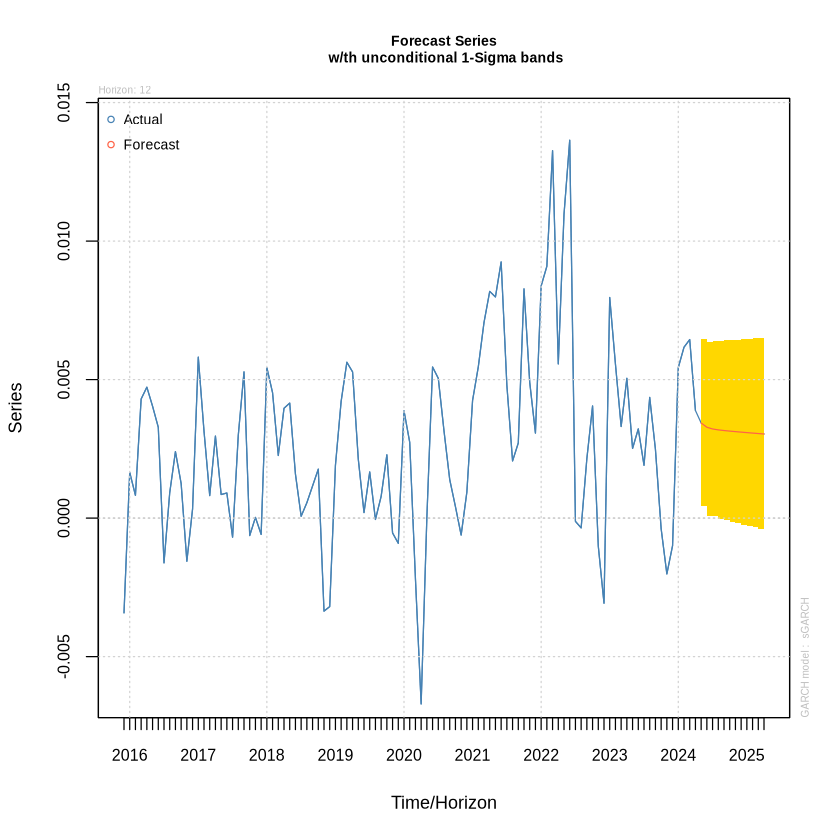

In [92]:
# Forecasting
garch_forecast <- ugarchforecast(best_model, n.ahead = 12)
plot(garch_forecast, which = 1) # Plot Conditional Mean

The forecasted series, represented by the red line, shows the predicted values extending into 2024 and 2025 with associated uncertainty captured by the yellow 1-sigma bands. The actual data, depicted in blue, fluctuates significantly over the observed period, indicating a volatile series. The forecast suggests a stabilization around the recent trend with a relatively narrow range of uncertainty, implying a moderate level of confidence in the predictions. Despite the model’s confidence, it is unlikely that the forecasted values are accurate given the volatile nature of the CPI prior to the predictions. We can transplant the GARCH  predictions using the same process we used on the SARIMA model.

In [94]:
garch_forecast_values <- as.numeric(garch_forecast@forecast$seriesFor)  # Extract mean forecast values

# Define the start date for the forecast
garch_forecast_start <- as.Date("2024-05-01")  # Adjust based on your data

# Frequency is 12 for monthly data
frequency <- 12

# Create a time sequence for the forecast
garch_forecast_dates <- seq.Date(garch_forecast_start, by = "month", length.out = length(garch_forecast_values))

# Create the time series object for the forecasted values
garch_forecast <- ts(garch_forecast_values, start = c(year(garch_forecast_start), month(garch_forecast_start)), frequency = frequency)

# Print the time series object
print(garch_forecast)

             Jan         Feb         Mar         Apr         May         Jun
2024                                                 0.003434127 0.003280000
2025 0.003086532 0.003069463 0.003052881 0.003036767                        
             Jul         Aug         Sep         Oct         Nov         Dec
2024 0.003218122 0.003185182 0.003161583 0.003141250 0.003122294 0.003104119
2025                                                                        


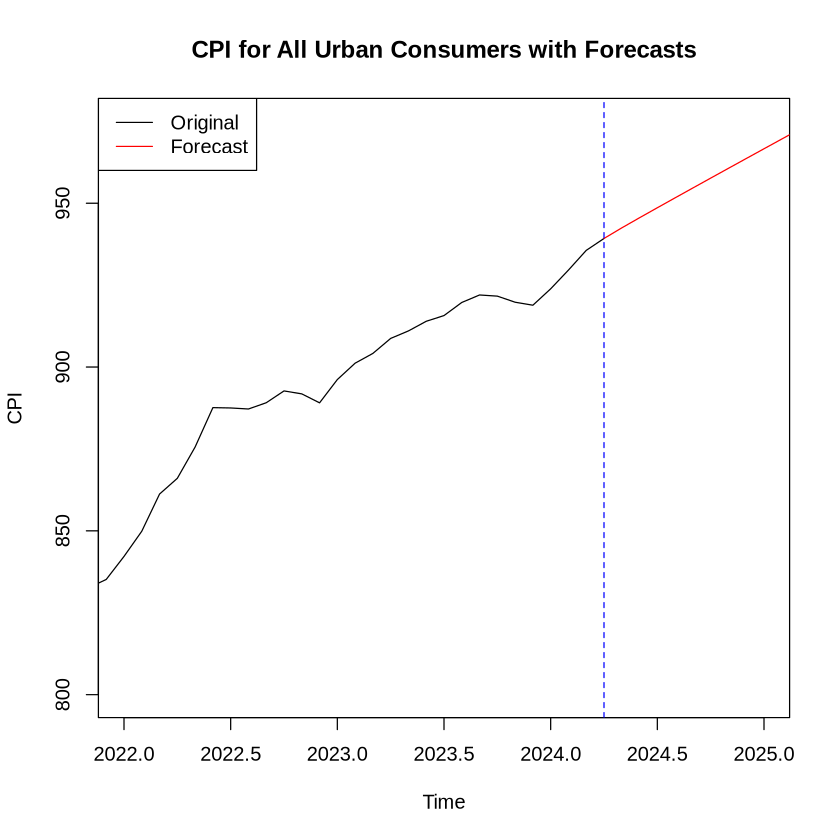

In [113]:
garch_reversed_log_ts = cumsum((c(last_actual_log, garch_forecast)))
#garch_reversed_log_ts
garch_original_forecasts = exp(garch_reversed_log_ts)

# Create the time series for the forecasts
garch_forecast_ts <- ts(garch_original_forecasts, start = end(ts), frequency = frequency)

# Append the forecasts to the original time series


# Plot the original series (in black)
plot(ts, ylab = "CPI", xlim = c(2022,2025), ylim =c(800,975), main = 'CPI for All Urban Consumers with Forecasts', col = 'black')

# Add the forecasted values (in red)
#lines(garch_forecast_ts, col = 'red')
lines(window(garch_forecast_ts, start = end(ts)), col = "red")

# Add vertical line indicating the forecast start
abline(v = end(ts) + .25, col = "blue", lty = 2)

# Add legend
legend("topleft", legend = c("Original", "Forecast"), col = c("black", "red"), lty = 1)


The forecasted values show a similar upward trend in the Consumer Price Index (CPI) to what we saw with the SARIMA model. However, the SARIMA model’s predictions include more of the volatility that is characteristic of the CPI, underpinning the superiority of that model.

## Results

After going over the various accuracy metrics, and visually comparing the predictions of the two models again, we can conclude that the SARIMA model’s predictions are more accurate. The SARIMA model has an AIC and BIC of about -10,325, compared to the GARCH’s measly -8. In addition, the SARIMA model seems to mimic the behavior of the CPI far better, predicting behavior that is hard to discern from the observed data, whereas GARCH’s predictions look extremely linear in comparison.

## Conclusion